In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
path = "C:\\ENS\\Hidrologia"
dados = pd.read_excel(path+'\\Dados_ANA.xlsx')
dados = dados.set_index('Data') 
dados['Q ord (m³/s)'] = sorted(dados['Vazão'], reverse=True)
dados['Ordem i'] = range(1, len(dados['Vazão'])+1)
dados['P exc (%)'] = 100*dados['Ordem i']/(len(dados['Ordem i'])+1)
dados.head()

,Vazão,Q ord (m³/s),Ordem i,P exc (%)
Data,,,,
1980-01-01,14.9940,1077.3507,1,0.007605
1980-01-02,13.8888,971.6529,2,0.015209
1980-01-03,12.8170,962.8472,3,0.022814
1980-01-04,11.2734,930.0946,4,0.030418
1980-01-05,9.8087,887.0893,5,0.038023


In [3]:
dados['abs(95-P)'] = abs(95-dados['P exc (%)'])
Q95 = dados.loc[dados['abs(95-P)'] == min(dados['abs(95-P)'])]
Q95 = Q95.reset_index()
Q95

,Data,Vazão,Q ord (m³/s),Ordem i,P exc (%),abs(95-P)
0,2014-03-14,12.0105,2.7761,12492,94.996198,0.003802
1,2014-03-15,10.0012,2.7761,12493,95.003802,0.003802


In [4]:
dados['abs(0.70-Qord)'] = abs(0.70-dados['Q ord (m³/s)'])
Q710 = dados.loc[dados['abs(0.70-Qord)'] == min(dados['abs(0.70-Qord)'])]
Q710

,Vazão,Q ord (m³/s),Ordem i,P exc (%),abs(95-P),abs(0.70-Qord)
Data,,,,,,
2015-12-05,85.2609,0.6692,13123,99.794677,4.794677,0.0308
2015-12-06,66.0088,0.6692,13124,99.802281,4.802281,0.0308
2015-12-07,47.8470,0.6692,13125,99.809886,4.809886,0.0308
2015-12-08,45.1918,0.6692,13126,99.817490,4.817490,0.0308
2015-12-09,43.4549,0.6692,13127,99.825095,4.825095,0.0308
2015-12-10,148.5727,0.6692,13128,99.832700,4.832700,0.0308
2015-12-11,74.3267,0.6692,13129,99.840304,4.840304,0.0308


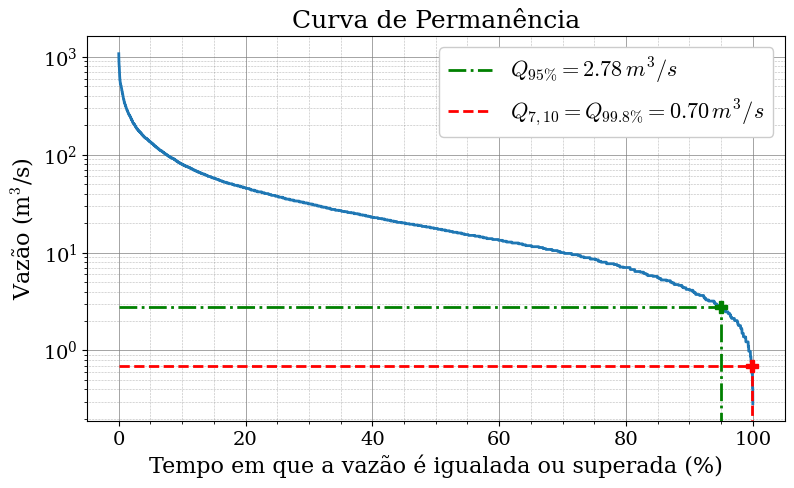

In [6]:
fig,ax = plt.subplots(figsize=(9,5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'

ax.plot(dados['P exc (%)'], 
        dados['Q ord (m³/s)'], 
        linewidth=2) 

y = Q95.loc[0, 'Q ord (m³/s)']
ax.plot([0, 95], 
        [y, y],
        color='green',
        linestyle='-.',
        linewidth=2,
        label=rf'$Q_{{95\%}}={y:.2f}\, m^3/s$') 
ax.plot([95, 95], 
        [0, y],
        color='green',
        linestyle='-.',
        linewidth=2) 
ax.plot(95, y, 
        marker='P', 
        color='green',
        markersize=8)

x = Q710['P exc (%)'].mean() 
ax.plot([0, x], 
        [0.7, 0.7],
        color='red',
        linestyle='--',
        linewidth=2,
        label=rf'$Q_{{7,10}}=Q_{{{x:.1f}\%}}=0.70\, m^3/s$') 
ax.plot([x, x], 
        [0, 0.7],
        color='red',
        linestyle='--',
        linewidth=2) 
ax.plot(x, 0.7, 
        marker='P', 
        color='red',
        markersize=8)

plt.yscale('log') 
plt.title('Curva de Permanência', size = 18)
plt.xlabel('Tempo em que a vazão é igualada ou superada (%)', 
           size = 16)
plt.ylabel(r'Vazão (m$^3$/s)', size = 16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.grid(True,
        which='major', 
        color='gray', 
        linestyle='-',
        linewidth=0.5)
ax.grid(True,
        which='minor', 
        color='gray', 
        linestyle=':',
        linewidth=0.4)
ax.minorticks_on()
plt.legend(fontsize=16, framealpha=1) 
plt.savefig(path+'\\permanencia.png', bbox_inches='tight') 